#  Mushroom classification

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train a model to predict whether or not a mushroom is poisonous using the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io).

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Load the mushroom dataset

In [2]:
df_mushroom = pd.read_csv('https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Machine_Learning_in_Python/Week2/Labs/data/mushrooms.csv')
df_mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Print a summary of the dataset

In [3]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Convert categorical variables into indicator variables

In [4]:
df_mushroom = pd.get_dummies(df_mushroom, drop_first=True)
df_mushroom

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,True,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


## Visualize the class distribution

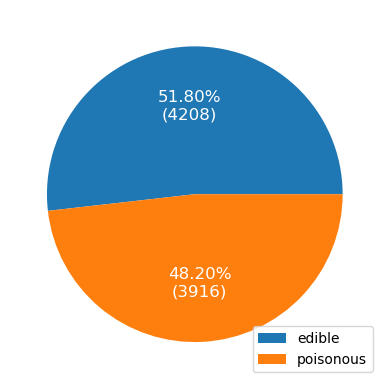

In [5]:
poisonous = df_mushroom["class_p"].sum()
edible = len(df_mushroom) - poisonous
labels = ["edible", "poisonous"]
sizes = [edible, poisonous]

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(labels)
plt.show()

## Split the data into training and test sets

In [6]:
X_mushroom = df_mushroom.iloc[:, 1:]
y_mushroom = df_mushroom.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, random_state=0)

##  Train a Decision Tree Classifier

In [7]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Get the most important features found by the Decision Tree

In [8]:
importances = pd.DataFrame(data={"Feature": X_train.columns, "Gini importance": decision_tree_classifier.feature_importances_}).sort_values(by="Gini importance", ascending=False).reset_index(drop=True)
most_important_features = importances[importances["Gini importance"] >= 0.01]
most_important_features

,Feature,Gini importance
0,odor_n,0.625144
1,stalk-root_c,0.169176
2,stalk-surface-below-ring_y,0.100325
3,spore-print-color_r,0.034375
4,odor_l,0.023504
5,stalk-color-above-ring_w,0.017094
6,spore-print-color_u,0.010353


## Perform a grid search for a Support Vector Classifier (SVC) classifier

Use only the most important features of the dataset.

In [9]:
gamma = np.logspace(-2, 2, 5)
C = np.logspace(-2, 2, 5)
parameters = {'gamma': gamma, 'C': C}

svc = SVC(random_state=0)
clf = GridSearchCV(svc, parameters, scoring='accuracy')
clf.fit(X_train[most_important_features["Feature"]], y_train)

pd.DataFrame(clf.cv_results_['mean_test_score'].reshape(5, 5), columns=[f"gamma = {i}" for i in gamma], index=[f"C = {i}" for i in C])

,gamma = 0.01,gamma = 0.1,gamma = 1.0,gamma = 10.0,gamma = 100.0
C = 0.01,0.516494,0.920894,0.977842,0.979156,0.979156
C = 0.1,0.914003,0.963727,0.994911,0.996389,0.996389
C = 1.0,0.963727,0.991465,0.996389,0.996389,0.996389
C = 10.0,0.986869,0.996389,0.996389,0.996389,0.996389
C = 100.0,0.991465,0.996389,0.996389,0.996389,0.996389


## Evaluate the best estimator chosen by the grid search

In [10]:
y_pred = clf.best_estimator_.predict(X_test[most_important_features["Feature"]])

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       False     1.0000    0.9906    0.9953      1061
        True     0.9898    1.0000    0.9949       970

    accuracy                         0.9951      2031
   macro avg     0.9949    0.9953    0.9951      2031
weighted avg     0.9951    0.9951    0.9951      2031



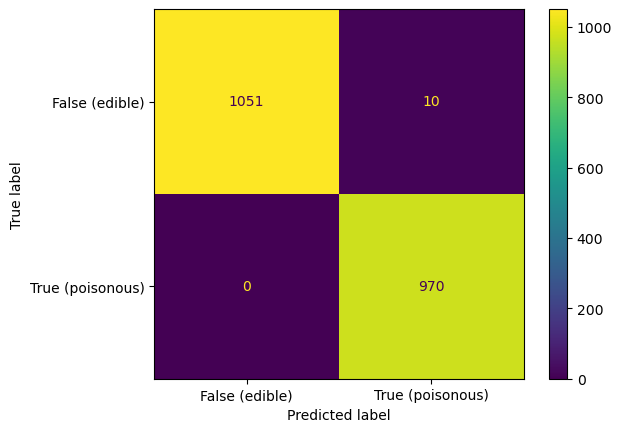

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["False (edible)", "True (poisonous)"])
plt.show()